In [5]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [6]:
path_filtered_data = Path('data/train_shuffled.csv')

Path('data/train_shuffled.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv(path_filtered_data)

,season,episode,scene,line_text,speaker,deleted
0,5,11,23,This is nuts.,Oscar,False
1,7,16,48,"[he office shushes Michael to hear the movie better] That's fine, it's great!",Jim,False
2,1,2,26,"[on the phone] Mr. Decker, we didn't lose your sale today, did we? Excellent. OK. Let me just get your... what's that? No, we didn't close last time. I just need your... Oh. W-What code were you given? Oh, OK. That's actually another salesman here. I can redo it if you want to do that. Oh, he gave you a discount? No, I don't blame you.",Jim,False
3,6,2,31,"Wow, that sounds pretty cool.",Jim,False
4,3,4,21,"Oh my God! Oh my God, come on ...",Michael,False
...,...,...,...,...,...,...
47147,2,12,16,"[loud noise in bathroom] No! Guh! OW! Awww, help, help me!",Michael,False
47148,3,4,55,"Nothing. Let's just... all right. [talks to warehouse guys] Guys, do you have a box we could use?",Michael,False
47149,8,15,16,Is there not? Maybe I'm just waiting for someone to wow me. [winks],Nellie,False
47150,8,22,15,"This confirms three things: I'm right about the senator, I still got it, and poor Angela.",Oscar,False


In [9]:
df_minimal = df.iloc[:1500]

,season,episode,scene,line_text,speaker,deleted
0,5,11,23,This is nuts.,Oscar,False
1,7,16,48,"[he office shushes Michael to hear the movie better] That's fine, it's great!",Jim,False
2,1,2,26,"[on the phone] Mr. Decker, we didn't lose your sale today, did we? Excellent. OK. Let me just get your... what's that? No, we didn't close last time. I just need your... Oh. W-What code were you given? Oh, OK. That's actually another salesman here. I can redo it if you want to do that. Oh, he gave you a discount? No, I don't blame you.",Jim,False
3,6,2,31,"Wow, that sounds pretty cool.",Jim,False
4,3,4,21,"Oh my God! Oh my God, come on ...",Michael,False
...,...,...,...,...,...,...
1495,7,8,1,"[sighs] They shouldn't televise any of this, it just encourages copy-cats.",Dwight,False
1496,3,23,38,"I agree. But in another way, I am off to a very good start, wouldn't you say?",Andy,False
1497,6,14,30,You look great.,David,False
1498,8,2,13,You like her.,Robert,False


<Axes: >

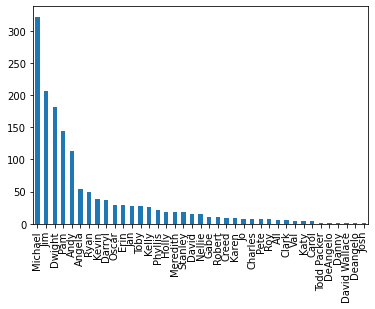

In [10]:
df_minimal['speaker'].value_counts().plot(kind='bar')

In [11]:
dls = TextDataLoaders.from_df(df_minimal, text_col='line_text', label_col='speaker')

In [12]:
dls.show_batch()

,text,category
0,"xxbos xxmaj xxunk xxunk just minutes from here , he xxunk only xxmaj german . xxmaj closed xxunk . xxmaj so , now , after the xxunk by all of your xxunk , we will xxunk at the xxunk . xxmaj so , xxmaj xxunk … [ xxunk xxmaj german to xxunk ; xxunk begins xxunk in xxmaj german ] xxmaj and away we go . xxmaj this is a little xxunk of the xxunk , if you will . xxmaj he 's xxunk why we 're here , what we 're doing here , making xxunk , xxwrep 3 blah … xxmaj then he 's gon na have xxmaj andy xxunk a bunch of stuff . xxmaj he 's gon na ask xxmaj andy to xxunk a ring . i have uh , now just uh … just some xxunk for our xxunk , and you will put the",Dwight
1,"xxbos xxmaj pam , would you stand up for a xxunk ? [ sits in xxmaj pam 's chair ] xxmaj hmm . xxmaj see how xxunk i am ? i like this chair . [ slowly xxunk into the chair ] xxmaj xxunk good xxunk , it is xxunk xxunk … it 's a good chair . i think we 're xxunk because we do n't appreciate the things that we have . xxmaj you think kids in xxmaj xxunk have xxunk ? xxmaj no . xxmaj they sit in big xxunk of garbage . xxmaj you think they have xxunk ? [ the chair has slowly xxunk xxunk almost to where xxmaj michael is not xxunk over the desk ] xxmaj they do n't have xxunk . xxmaj they do n't xxunk [ xxunk to get up from xxmaj pam 's chair ] xxmaj xxunk ! xxmaj they",Michael
2,"xxbos i did n't watch the whole xxunk . xxmaj after a xxunk xxunk , it was too xxunk . i xxunk xxunk to xxunk at xxmaj pam . xxmaj it took me so long to do so many xxunk things . xxmaj it 's just hard to xxunk that i spent so many years being less happy than i could have been . xxmaj jim was 5 xxunk from my desk and it took me four years to get to him . xxmaj it 'd be great if people saw this xxunk and xxunk from my xxunk . xxmaj not that xxmaj i 'm a xxunk person . xxmaj i 'm really happy now . xxmaj xxunk would xxunk make my heart xxunk if someone out there saw this and she said to xxunk ' be strong , xxunk yourself , love yourself . xxmaj xxunk your xxunk .",Pam
3,"xxbos [ xxunk in car ; xxunk to office ; xxunk ice cream out of xxunk ] xxmaj how do i feel about xxunk up with xxmaj donna ? xxmaj good . xxmaj xxunk . i feel xxunk . [ xxunk ; cut to xxmaj donna who is xxunk in the parking lot of the xxunk ] xxmaj like a xxunk xxunk text from phone ] xxmaj that was not easy because i really xxunk her a lot . xxmaj and xxmaj i 'm a little bit xxunk right now because i know that i absolutely made the right xxunk . [ donna has xxunk look ; cut back to xxmaj michael in his office xxunk ice cream ] xxmaj at the end of the day , we have to do what 's right . xxmaj and it was either xxunk with myself or … being happy . xxmaj and",Michael
4,"xxbos xxmaj no , no . xxmaj that would not be xxunk . xxmaj actually , they just do n't get very much work done when xxmaj i 'm not here . [ jan xxunk at xxmaj michael ] xxmaj that 's not true . i know how to xxunk , and they do more work done when xxmaj i 'm not here . xxmaj not more . xxmaj the same amount of work is done , xxunk i am here or not . [ another xxmaj jan xxunk ] xxmaj hey , everybody , listen up . xxmaj this is what we 're gon na do . xxmaj you sit xxunk , until i xxunk . xxmaj xxunk good ? xxmaj does n't matter , it 's an order . xxmaj xxunk it xxunk , xxunk , ok ? xxmaj alright , xxunk . [ to xxmaj oscar ]",Michael
5,"xxbos xxmaj you know , every time i think i hit xxunk bottom at my job , the floor opens up , like at a xxunk ride . xxmaj i 'm gon na xxunk my xxunk . xxmaj xxunk , four - year xxunk , xxunk xxunk , business xxunk , xxunk in a beet xxunk . i … there 's a xxunk xxunk . ' hey , mom . ' ' hey , xxmaj ryan . xxmaj how 's that five - year plan coming ? ' ' oh , it 's great . xxmaj today , i xxunk down in xxunk manure and i got xxunk in a beet xxunk . ' ' oh , that 's cool . ' ' yeah , that 's really cool . xxmaj i 'm xxunk a lot . xxmaj i 'm really glad i took this xxunk - time job .",Ryan
6,"xxbos xxmaj try ' xxunk ' . xxmaj no ! xxmaj try 

In [28]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.75, metrics=accuracy)

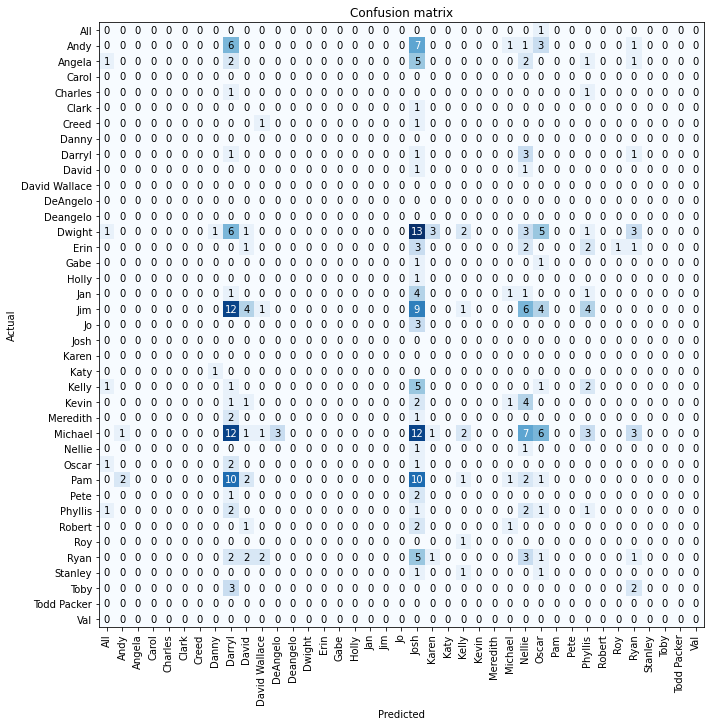

In [32]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(10,10))

In [14]:
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.799558,3.623379,0.073333,00:05


epoch,train_loss,valid_loss,accuracy,time
0,3.538018,3.624443,0.093333,00:02
1,3.482715,3.601352,0.083333,00:02
2,3.357860,3.540340,0.096667,00:02
3,3.147012,3.307070,0.113333,00:03
4,2.961212,3.333926,0.110000,00:02
5,2.805932,3.241065,0.110000,00:02
6,2.669440,3.282063,0.110000,00:02
7,2.551798,3.279227,0.106667,00:02
8,2.453663,3.282209,0.110000,00:04
9,2.386561,3.308532,0.110000,00:02


In [15]:
# learner.save('/content/drive/My Drive/Weights/DunderAI/best_leaner_27_acc')

In [16]:
doc(learner.fine_tune)

Learner.fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, *, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False, start_epoch=0)
Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [17]:
learner.show_results()

,text,category,category_
0,"xxbos xxmaj you xxunk ' to me ? xxmaj you xxunk ' to me ? ' xxunk xxmaj xxunk . ' xxmaj xxunk . xxmaj oh , i want that xxunk . i want it . i need it . xxmaj ah , i have to get back to work . i have xxunk of work … xxmaj oh , oh check this out . xxmaj come here . [ michael opens his xxunk and looks at xxmaj ryan in the parking lot ] xxmaj there he is . xxmaj mr . xxmaj xxunk . xxmaj having lunch by the car . xxmaj let us play with him . xxmaj this 'll be hilarious . [ calls xxmaj ryan on the phone , xxmaj ryan does n't pick up after seeing that xxmaj michael is calling ] xxmaj oh , we 're xxunk phone xxunk .",Michael,Jim
1,"xxbos i xxunk to xxmaj kevin . xxmaj holly and i can never be just friends . i wrote down a list of xxunk points why xxmaj holly and i should be together , and xxmaj i 'm going to find the perfect xxunk today and i am going to tell her . xxmaj number one : ' holly , you and i are xxunk xxunk . ' xxmaj the - and the reason is … because … in xxunk of the xxunk , we like xxunk that does n't make any sense . xxmaj we 're xxunk xxunk . xxmaj holly and i are xxunk xxunk .",Michael,Michael
2,"xxbos i have an xxunk amount of xxunk trying to get people to come to my place . xxmaj and i hate it . i ca n't tell you how much xxunk xxunk i have xxunk up eating over the years . i do n't even know why i make it in such great xxunk . xxmaj here 's what we 're gon na do . xxmaj we are going to sit here for a while , make it look good . xxmaj and maybe you should cry . xxmaj can you make yourself cry ?",Michael,Michael
3,"xxbos xxmaj come on in . xxmaj have a seat . xxmaj uh , thanks for coming in , i just got ta get something off my xxunk . i just got some really weird news and uh , xxmaj i 'm just gon na come out and say it . i just got off the phone with my doctor , and it turns out i xxunk [ xxunk xxunk screen ] xxunk … from xxmaj erin . xxmaj and it 's xxunk . xxmaj pretty xxunk huh ?",Andy,Jim
4,"xxbos xxmaj excuse me , everyone , could i have your attention please . i just wanted to say that the women in this office are xxunk . xxmaj xxunk the xxunk who wrote that stuff about xxmaj michael on the bathroom wall . xxmaj having a bathroom is a xxunk . xxmaj it is called a ladies room for a reason . xxmaj and if you can not xxunk like ladies , well then you are not going to have a bathroom .",Dwight,Pam
5,"xxbos xxmaj last week i gave a fire safety talk . [ xxunk throat ] xxmaj and nobody xxunk any attention . xxmaj it 's my own fault for xxunk xxunk . xxunk is xxunk . xxmaj people learn in a lot of different xxunk , but xxunk is the best xxunk . [ xxunk a cigarette ] xxmaj today , xxunk is gon na save xxunk . [ throws cigarette into garbage can xxunk with paper and xxunk xxunk ]",Dwight,Michael
6,"xxbos xxmaj little girl . xxmaj come over here . xxmaj shake my hand . xxmaj come on , i do n't have all day . [ xxunk shakes his hand ] i do n't feel anything . xxmaj nothing . [ to xxmaj jim ] xxmaj you 're so xxunk . [ xxunk walks over and xxunk with xxmaj dwight 's xxunk ] xxmaj uh , excuse me , these are xxunk xxunk 's xxunk , okay ?",Dwight,Michael
7,"xxbos i xxunk a xxunk xxunk into the xxunk of the xxunk . xxmaj now i can xxunk xxmaj jim , xxunk xxmaj jim , and xxunk xxmaj jim , just like in the xxmaj xxunk xxunk xxunk . xxmaj only this time , the xxunk xxunk the xxunk xxunk . xxmaj and of course in this xxunk you lose the whole xxunk xxunk of the xxmaj xxunk thing .",Dwight,Jim
8,"xxbos xxmaj did i throw this party to xxunk my xxunk ? xxmaj that 's crazy . xxmaj now , if they wanted a garden party , they could throw one xxunk , which , as a matter of xxunk , they did , last week . xxmaj they xxunk one for my baby xxunk who is xxunk amazing , but i could n't care less .",Andy,Dwight


In [18]:
learner.predict("Bears, beets, battlestar galactica")

('Dwight',
 tensor(13),
 tensor([0.0023, 0.0650, 0.0306, 0.0013, 0.0021, 0.0077, 0.0069, 0.0039, 0.0189,
         0.0030, 0.0040, 0.0007, 0.0011, 0.3203, 0.0275, 0.0146, 0.0022, 0.0015,
         0.0058, 0.0003, 0.0007, 0.0027, 0.0008, 0.0232, 0.1376, 0.0049, 0.2493,
         0.0054, 0.0048, 0.0176, 0.0007, 0.0030, 0.0053, 0.0029, 0.0100, 0.0040,
         0.0047, 0.0013, 0.0014]))

In [19]:
learner.predict("This is war. This is not a game")

('Michael',
 tensor(26),
 tensor([0.0037, 0.1451, 0.0416, 0.0007, 0.0035, 0.0067, 0.0046, 0.0024, 0.0713,
         0.0022, 0.0012, 0.0030, 0.0018, 0.0298, 0.0200, 0.0075, 0.0024, 0.0038,
         0.0051, 0.0017, 0.0038, 0.0024, 0.0018, 0.0075, 0.0780, 0.0101, 0.4583,
         0.0090, 0.0273, 0.0077, 0.0018, 0.0026, 0.0084, 0.0016, 0.0034, 0.0052,
         0.0040, 0.0008, 0.0082]))

epoch,train_loss,valid_loss,accuracy,time
0,2.476497,4.046270,0.113333,00:02
1,2.721188,3.332885,0.103333,00:02
2,2.801702,3.032195,0.170000,00:02
3,2.827339,2.950839,0.156667,00:03


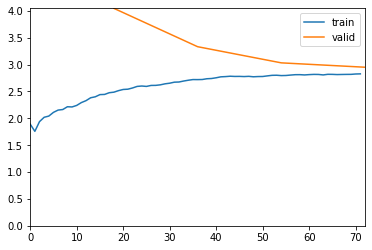

In [20]:
learner.fit_one_cycle(4, 1e-2, cbs=[ShowGraphCallback()])

In [21]:
learner.predict('let me describe the perfect date')

('Michael',
 tensor(26),
 tensor([0.0022, 0.0618, 0.0376, 0.0027, 0.0050, 0.0032, 0.0048, 0.0005, 0.0312,
         0.0142, 0.0007, 0.0007, 0.0011, 0.1290, 0.0141, 0.0065, 0.0181, 0.0142,
         0.1441, 0.0044, 0.0005, 0.0071, 0.0020, 0.0176, 0.0199, 0.0124, 0.1988,
         0.0092, 0.0267, 0.1299, 0.0042, 0.0093, 0.0026, 0.0060, 0.0174, 0.0109,
         0.0248, 0.0016, 0.0029]))

In [22]:
learner.validate()

(#2) [2.950838565826416,0.15666666626930237]

In [25]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,2.803529,2.984664,0.150000,00:02
1,2.795067,3.169147,0.170000,00:02
2,2.812475,3.198976,0.163333,00:02
3,2.819832,3.154094,0.060000,00:03
4,2.818061,3.422097,0.130000,00:02
5,2.816745,3.094038,0.116667,00:02
6,2.808142,3.624233,0.116667,00:02
7,2.804423,3.220709,0.160000,00:02
8,2.801381,3.744703,0.093333,00:03
9,2.785851,3.369007,0.163333,00:02


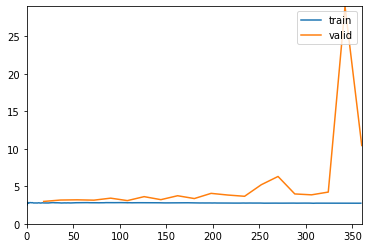

In [26]:
learner.fit_one_cycle(20, 1e-2, cbs=[ShowGraphCallback()])